# Homework: Decipherment

## Initial Exploratory Work in Beam Search

The initial work we decided on doing for this assignment would be to implement a successful beam search algorithm. We base it upon the algorithm that is posted on the assignment page:
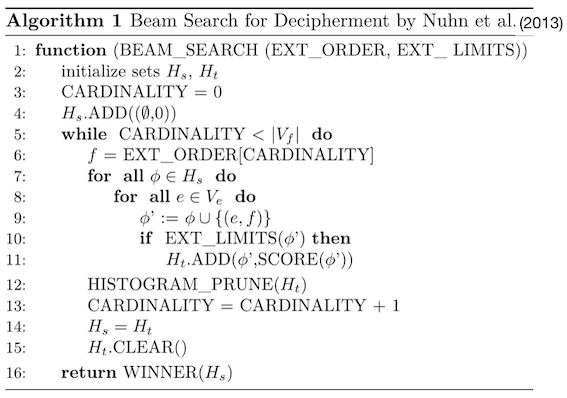

Initial things to be figured out:

1. Data type of Hs and Ht containers
2. Implementation of phi' = phi UNION {(e,f)}
3. Implementation of Histogram Prune 

Initially, exploratory work was done by basing Hs and Ht to be **dictionaries** in Python. However, upon closer examination, we realized that the implementation of a key-value framework may not be suitable for them as they would contain multiple sets that might have very similar keys or directly similar keys. As a result, **this idea was scrapped.**

Implementation of phi' was also not immediately decided as it depended on what we would have Hs and Ht be (as they are contains of values of phi'). 

Implementation of Histogram Prune was also something not yet decided before thorough reading on the research paper. At first, it was assumed that we would be keeping EXT_LIMIT sets of values, but it was determined that the algorithm did not function this way.

In [111]:
import ngram
LM = ngram.LM("data/6-gram-wiki-char.lm.bz2", n=6, verbose=False)

Reading language model from data/6-gram-wiki-char.lm.bz2...


KeyboardInterrupt: 

In [1]:
import string
import math
import copy
cipher = "BURGER"
cipher = read_file("data/cipher.txt")
def heuristic(map_to_score, new_char, union_phi, current_score):
    return score_map(map_to_score)


def beam_search(ext_order, ext_limits_func, cipher, union_phi_func, score_func, prune_beam_size = 10000):
    Hs = list()
    Ht = list()
    V = string.ascii_lowercase[:]
    cardinality = 0
    Hs.append((dict(), -math.inf))
    cipher_desc = get_statistics(cipher, cipher=True)
    while cardinality < cipher_desc['vocab_length']:
        print("cardinality is {0}".format(cardinality))
        f = ext_order[cardinality]
        for phi in Hs:
            for e in V:
                #print("phi handling is {0} with score {1}".format(phi[0], phi[1]))
                new_phi = union_phi_func(phi[0], (f,e))
                #print("new phi is {0}".format(new_phi))
                if ext_limits_func(new_phi):
                    Ht.append((new_phi,score_func(new_phi)))
        Hs = sorted(Ht, key=lambda tup:tup[1])[:prune_beam_size]
        #print("first one is ", Hs[0], "last one is ", Hs[-1])
        cardinality += 1
        Ht = list()
    best_score = -math.inf
    best_phi = Hs[0][0]
    for phi, score in Hs:
        if best_score < score:
            best_score = score
            best_phi = phi
    return best_phi

def get_ext_order(cipher):
    cipher_desc = get_statistics(cipher, cipher=True)
    list_of_letters = list(map(lambda c : c[0], list(cipher_desc['frequencies'].most_common(54))))
    return list_of_letters

def ext_limits_func(phi):
    limit = 1
    #print("new phi is ", phi)
    return Counter(phi.values()).most_common(1)[0][1] <= limit

def union_phi_func(phi, new_fix):
    new_phi = copy.deepcopy(phi)
    if new_fix[0] in phi.keys():
        new_phi[new_fix[0]] += new_fix[1]
    else:
        new_phi[new_fix[0]] = new_fix[1]
    return new_phi

def score_map(map_to_score):
    text_to_score = cipher
    bit_string_span = ""
    for i, each_char in enumerate(text_to_score):
        if each_char not in map_to_score.keys():
            bit_string_span += '.'
        else:
            bit_string_span += 'o'
            #print("replacing {0} with {1} at index {2}".format(each_char, map_to_score[each_char], i))
            text_to_score = text_to_score[:i] + map_to_score[each_char] + text_to_score[i + 1:]
    #print("span is {0}".format(bit_string_span[:50]))
    #print("text to score is ", text_to_score[:50])
    #print("score is ",LM.score_bitstring(cipher, bit_string_span))
    #print("bit_string_span is {}".format(bit_string_span))
    return LM.score_bitstring(cipher, bit_string_span)

print("text to decode is {0}".format(cipher))
found_mapping = beam_search(get_ext_order(cipher), ext_limits_func, cipher, union_phi_func, score_map)
#phi = {'B':'b'} bcadea
#print(Counter(phi.keys()).most_common(1)[0][0])
#ext_limits_func(phi)
#new_phi = union_phi_func(phi, ('B', 'c'))
print(found_mapping)
decoded = ""
for each in cipher:
    decoded += found_mapping[each]
print("decoded text is:", decoded)

                

NameError: name 'read_file' is not defined

In [110]:
decoded = 'IlikekillingpeoplebecauseitissomuchfunitismorefunthankillingwildgameintheforestbecausemanisthemostdangerousanimalofalltokillsomethinggivesmethemostthrillingexperienceitisevenbetterthangettingyourrocksoffwithagirlthebestpartofitisthatwhenIdieIwillbereborninparadiseandallthepeopleIhavekilledwillbecomemyslavesIwillnotgiveyoumynamebecauseyouwilltrytoslowdownorstopmycollectingofslavesformyafterlife'
print(len(decoded))
print(LM.score_seq(cipher))

396
-20370.424361055007
